<a href="https://colab.research.google.com/github/asgarali429/Machine-learning/blob/main/HandlingMissingValue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Complete Case Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [3]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [4]:
col = [var for var in df.columns if df[var].isnull().mean()*100 <5 and df[var].isnull().mean()>0.0001]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [5]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
7581,0.897,no_enrollment,High School,20.0,76.0
13666,0.920,Part time course,Graduate,2.0,4.0
13661,0.920,no_enrollment,Masters,20.0,74.0
2819,0.767,Full time course,Graduate,15.0,84.0
11175,0.920,no_enrollment,Graduate,20.0,111.0


In [6]:
len(df[col].dropna())/len(df[col])

0.8968577095730244

In [7]:
new_df = df[col].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

array([[<Axes: title={'center': 'city_development_index'}>,
        <Axes: title={'center': 'experience'}>],
       [<Axes: title={'center': 'training_hours'}>, <Axes: >]],
      dtype=object)

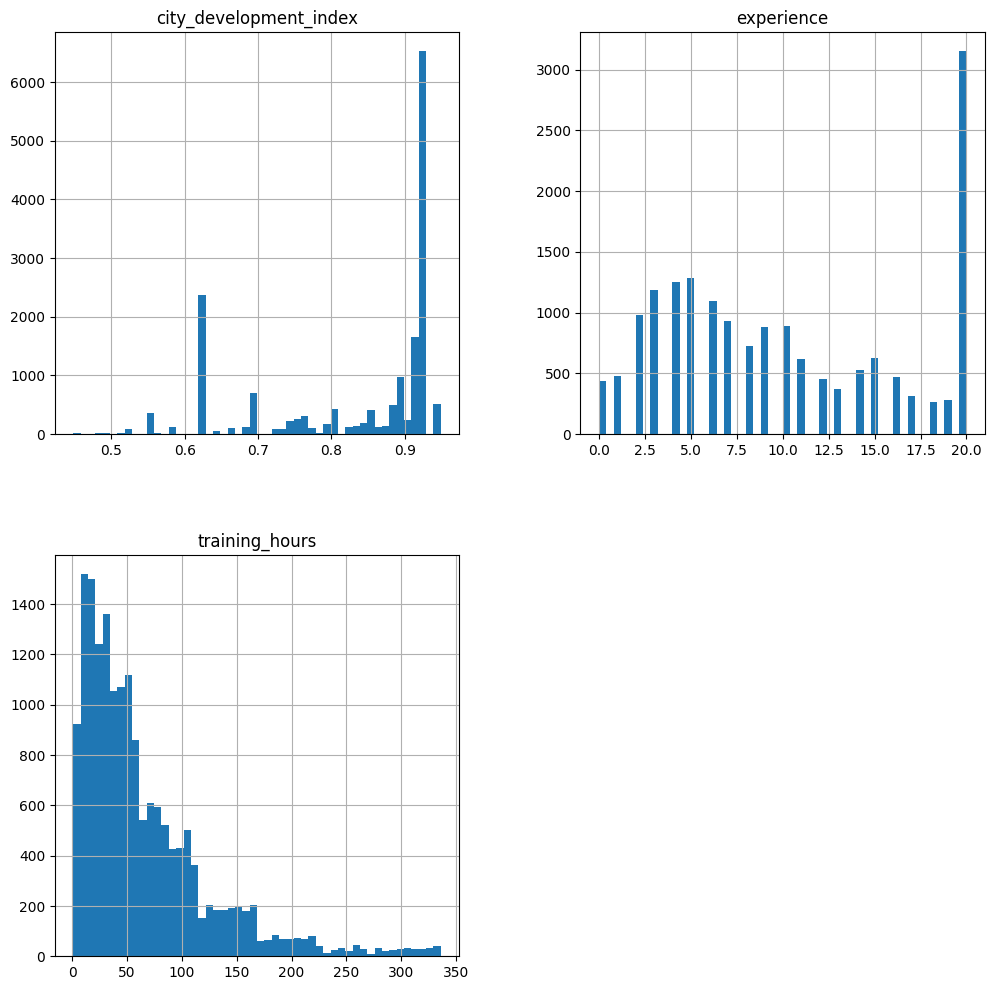

In [8]:
new_df.hist(bins=50,figsize=(12,12))

<Axes: >

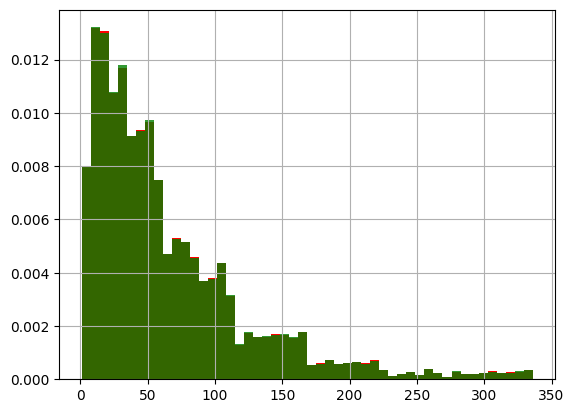

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
#orginal data
df['training_hours'].hist(bins=50,ax=ax ,density=True,color ='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50,ax=ax,color='green',density=True,alpha = 0.8)


<Axes: ylabel='Density'>

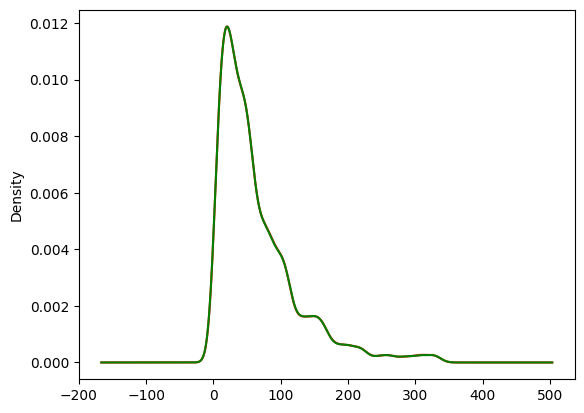

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='green')

<Axes: >

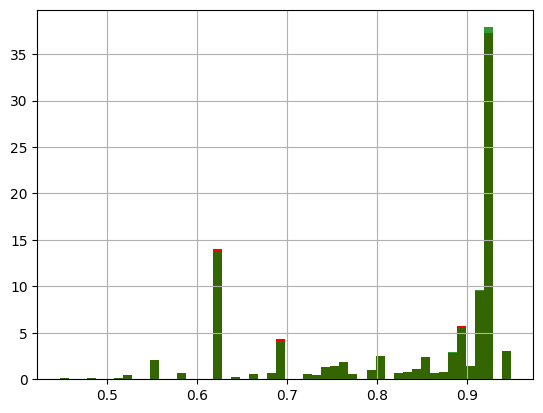

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

df['city_development_index'].hist(bins=50,ax=ax,density=True,color = 'red')

new_df['city_development_index'].hist(bins=50,ax=ax,density=True,color='green',alpha=0.8)

<Axes: ylabel='Density'>

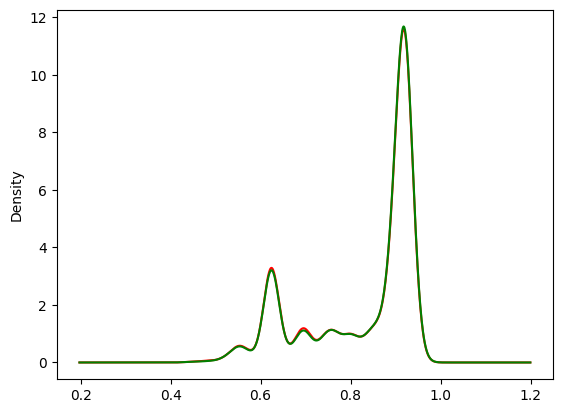

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['city_development_index'].plot.density(color = 'red')
new_df['city_development_index'].plot.density(color='green')

In [13]:
temp = pd.concat([df['enrolled_university'].value_counts()/len(df),new_df['enrolled_university'].value_counts()/len(new_df)],axis=1)
temp.columns = ['original','cca']
temp


,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [14]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


when the data is missing completly at random and we have sufficient data and if values are missing between 0 to 5 percent then we perform complete case analysis

##Mean-Median Imputation

In [15]:
df = pd.read_csv("data_science_job.csv")


In [16]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [17]:
cols = [var for var in df.columns if df[var].isnull().mean()*100<5 and df[var].isnull().mean()*100>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [18]:

def missing(df,cols):
  for col in cols:
    mean = df[col].mean()
    median = df[col].median()

    mean_col_name = f"{col}_mean"
    median_col_name = f"{col}_median"

    df[mean_col_name] = mean
    df[median_col_name] = median
    return df

In [19]:
df = missing(df,cols)

In [20]:
df.isnull().sum()

enrollee_id                         0
city                                0
city_development_index            479
gender                           4508
relevent_experience                 0
enrolled_university               386
education_level                   460
major_discipline                 2813
experience                         65
company_size                     5938
company_type                     6140
training_hours                    766
target                              0
city_development_index_mean         0
city_development_index_median       0
dtype: int64

Mean-Median Imputation using sklearn

In [21]:
## we can also compute with sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# trf = ColumnTransformer([
#     ('imputer1',SimpleImputer(strategy='mean')['city_deveplopment_index']),
#     ('imputer2',SimpleImputer(strategy='median')['traning_hours'])
# ]remainder='passthrough')
# xtrain = trf.fit_transform(xtrain)
# xtest = trf.transform(xtest)

##Handling missing categorical value

In [22]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [24]:

for i in df:
  if df[i].dtype == 'object':
    print(i)

city
gender
relevent_experience
enrolled_university
education_level
major_discipline
company_size
company_type


In [25]:
df= df.select_dtypes(include=['object'])

In [26]:
df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,NaN,NaN
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,city_21,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,NaN
3,city_115,NaN,No relevent experience,NaN,Graduate,Business Degree,NaN,Pvt Ltd
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup


In [27]:
df.isnull().mean()

city                   0.000000
gender                 0.235306
relevent_experience    0.000000
enrolled_university    0.020148
education_level        0.024011
major_discipline       0.146832
company_size           0.309949
company_type           0.320493
dtype: float64

In [28]:
def missing_ctg(df):
  for col in df:
    if df[col].isnull().mean()*100 <10 :
      mode = df[col].mode()[0]
      df[col].fillna(mode,inplace=True)
    else:
      df[col].fillna('missing',inplace=True)
  return df

In [29]:
df = missing_ctg(df)

In [30]:
df.head()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_size,company_type
0,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,missing,missing
1,city_40,Male,No relevent experience,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,city_21,missing,No relevent experience,Full time course,Graduate,STEM,missing,missing
3,city_115,missing,No relevent experience,no_enrollment,Graduate,Business Degree,missing,Pvt Ltd
4,city_162,Male,Has relevent experience,no_enrollment,Masters,STEM,50-99,Funded Startup


Handing Categorical missing data using sklearn

In [31]:
## we can also compute with sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# trf = ColumnTransformer([
#     ('imputer1',SimpleImputer(strategy='mode')['gender'])
#
# ]remainder='passthrough')
# xtrain = trf.fit_transform(xtrain)
# xtest = trf.transform(xtest)

if the 10% of data is missing than we can apply a mode .if the data is more than 10% than we can replace with another value,example 'Missing'

In [32]:
def missing_imputation(df, cols):
    for col in cols:
        # For numerical columns
        if df[col].dtype != 'object':
            mean = df[col].mean()
            median = df[col].median()
            mean_col_name = f"{col}_mean"
            median_col_name = f"{col}_median"
            df[mean_col_name] = df[col].fillna(mean)
            df[median_col_name] = df[col].fillna(median)
        # For categorical columns
        else:
            if df[col].isnull().mean() * 100 < 10:
                mode = df[col].mode()[0]
                df[col].fillna(mode, inplace=True)
            else:
                df[col].fillna('missing', inplace=True)
    return df


### KNNImputer + MissingIndicator

In [34]:
df = pd.read_csv('train.csv')[['Age','Pclass','Fare','Survived']]

In [38]:
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [41]:
df.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [42]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [51]:
knn = KNNImputer(n_neighbors=3,weights='distance',add_indicator=True)  ##add_indicator help the model to differentiate nan value and xtrain value
xtrain_trf = knn.fit_transform(X_train)
xtest_trf = knn.transform(X_test)

clf = LogisticRegression()
clf.fit(xtrain_trf,y_train)
ypred = clf.predict(xtest_trf)
print(accuracy_score(y_test,ypred))

0.7150837988826816


In [52]:
si = SimpleImputer(add_indicator=True)
xtrain_trf2 = si.fit_transform(X_train)
xtest_trf2 = si.transform(X_test)

clf = LogisticRegression()
clf.fit(xtrain_trf2,y_train)
yped = clf.predict(xtest_trf2)
print(accuracy_score(y_test,yped))

0.6983240223463687


#IterativeImputer

In [57]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [59]:
II = IterativeImputer()
xtrainII = II.fit_transform(X_train)
xtestII = II.transform(X_test)

clf = LogisticRegression()
clf.fit(xtrainII,y_train)
ypred = clf.predict(xtestII)
print(accuracy_score(y_test,ypred))

0.6927374301675978


Use simpleImputer when you have to perform univariate imputation . use KNNImputer when you have multivariate imputation and data share some relation with each other .Use iterativeimputer for regression model is works well than KNN imputer ,it is also a multivariate imputation